# **Importing libraries and exploring the dataset**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
display(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [25]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


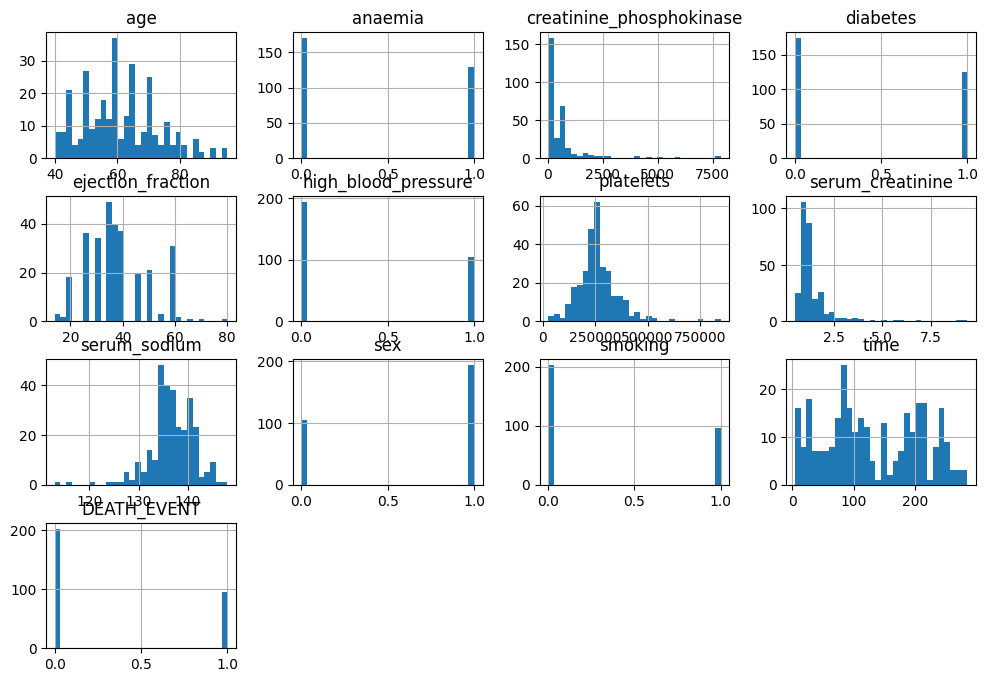

In [32]:
df.hist(figsize=(12, 8), bins=30)
plt.show()


## **Checking for missing values**

In [33]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


No missing values !

##**Checking for duplicate rows**

In [34]:
df.duplicated().sum()

0

No duplicate rows !

## **Reducing Multilinearity (correlation)**

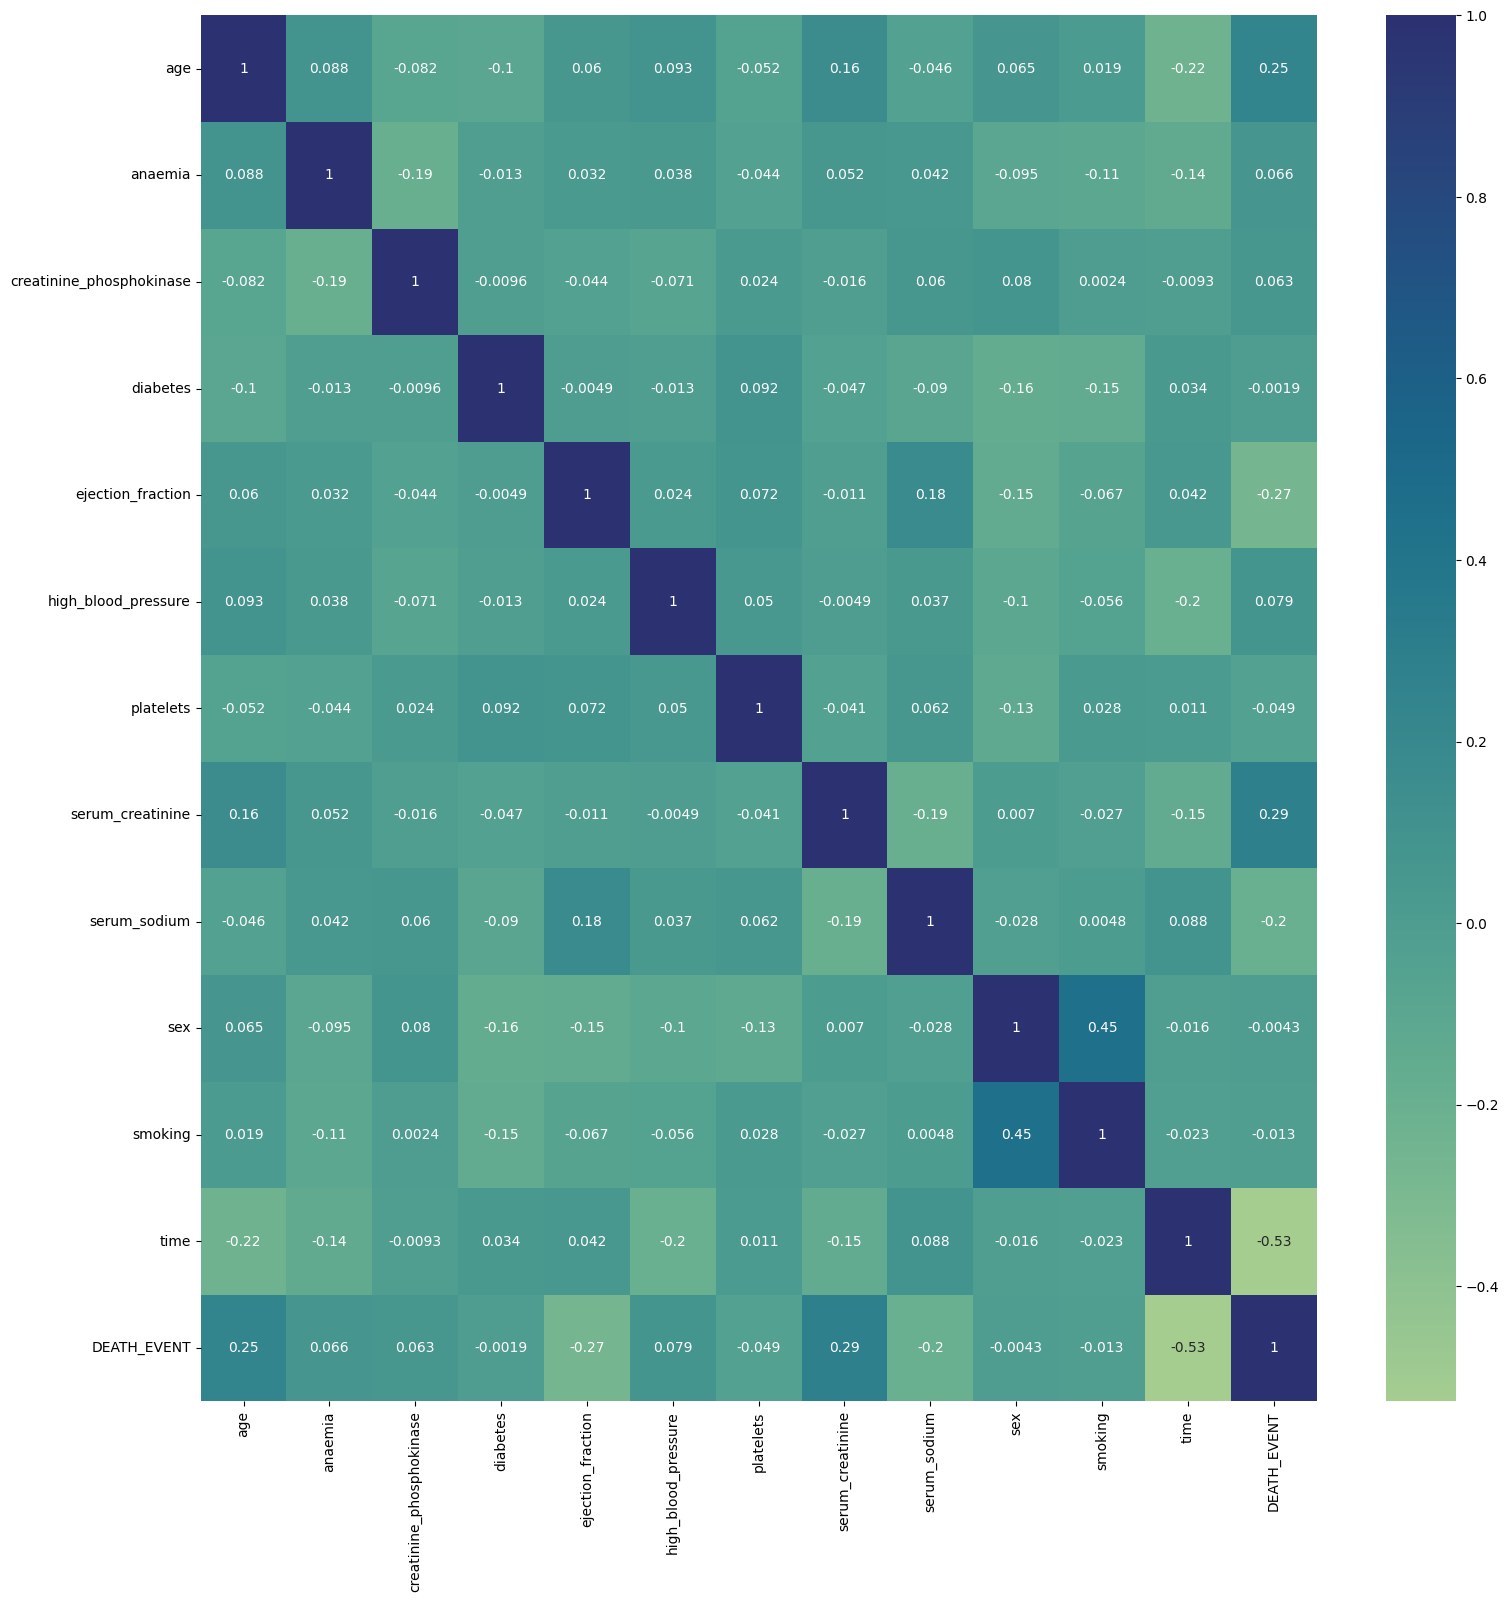

In [35]:
# Heatmap to visualize correlation between features

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='crest')

plt.show()

in facto, the highest correlation value between two features is 0.45 (smoking - sex). However, this correlation highly depends on the sample we worked on.
```
num_males = (df["sex"] == 1).sum()
num_females = (df["sex"] == 0).sum()
print(f"Males: {num_males}, Females: {num_females}")

        --> Males: 194, Females: 105
```
Consequently, we chose to ignore this correlation and leave the dataset as it is.



# **Managing Outliers**

## **Retriving and visualizing outliers** ##

In [36]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number):  # Select solely numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Application on the dataframe
outliers_dict = detect_outliers_iqr(df)

# Displaying the outliers for each column
for col, values in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(values, "\n")


Outliers in age:
Series([], Name: age, dtype: float64) 

Outliers in anaemia:
Series([], Name: anaemia, dtype: int64) 

Outliers in creatinine_phosphokinase:
1      7861
38     2656
46     1380
52     3964
60     7702
72     5882
103    5209
107    1876
130    1808
134    4540
139    1548
147    1610
149    2261
153    1846
163    2334
164    2442
171    3966
176    1419
187    1896
200    1767
208    2281
227    2794
246    2017
250    2522
280    2695
283    1688
295    1820
296    2060
297    2413
Name: creatinine_phosphokinase, dtype: int64 

Outliers in diabetes:
Series([], Name: diabetes, dtype: int64) 

Outliers in ejection_fraction:
64     80
217    70
Name: ejection_fraction, dtype: int64 

Outliers in high_blood_pressure:
Series([], Name: high_blood_pressure, dtype: int64) 

Outliers in platelets:
7      454000.0
15      47000.0
47     451000.0
55     461000.0
69     497000.0
105    621000.0
109    850000.0
117    507000.0
162    448000.0
163     75000.0
167     70000.0
200  

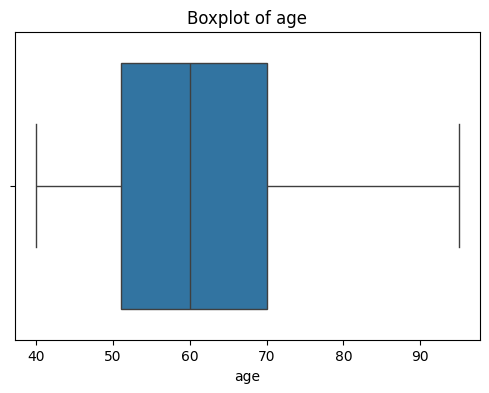

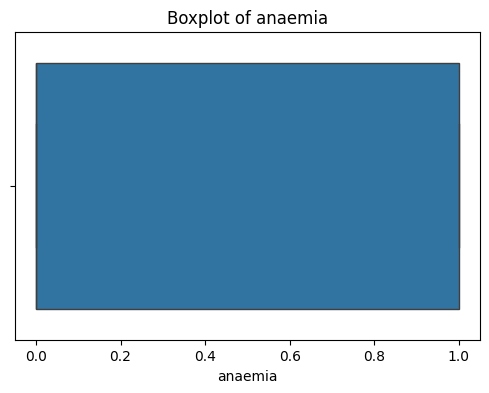

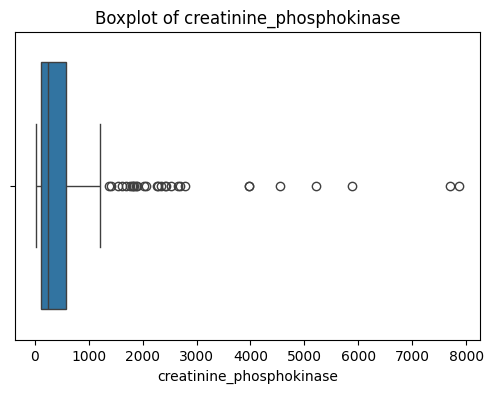

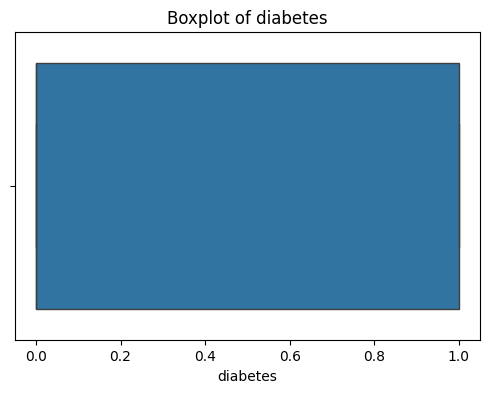

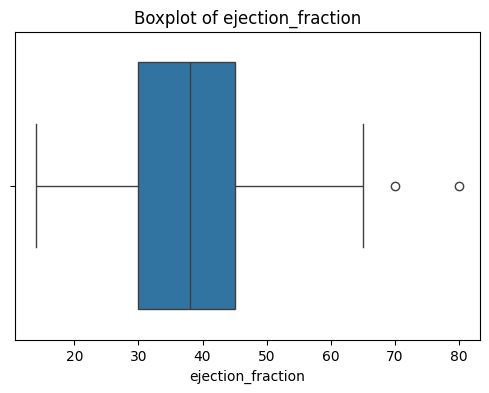

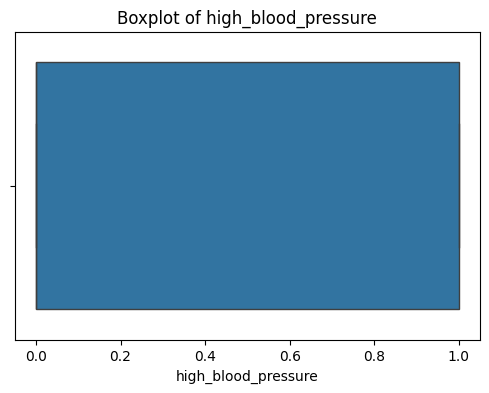

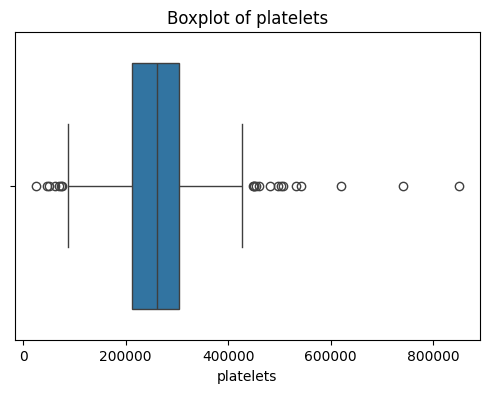

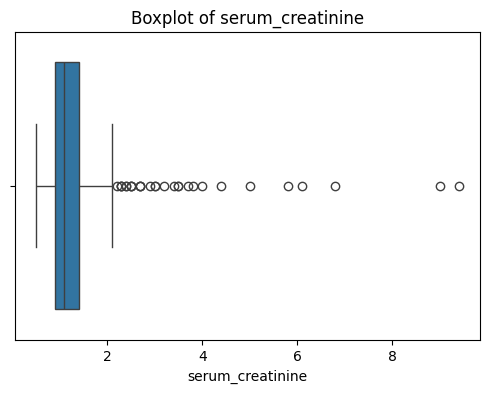

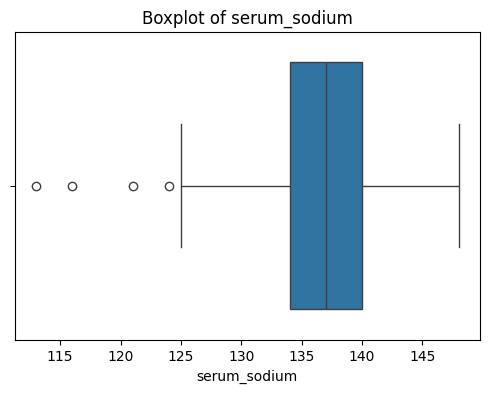

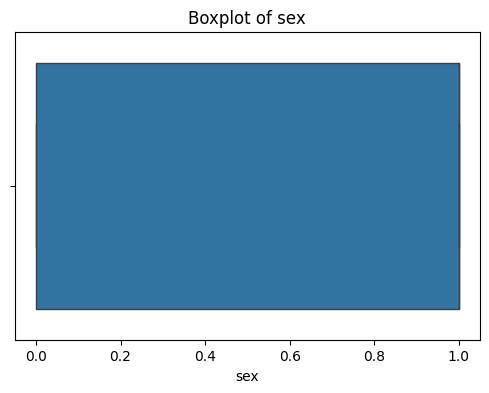

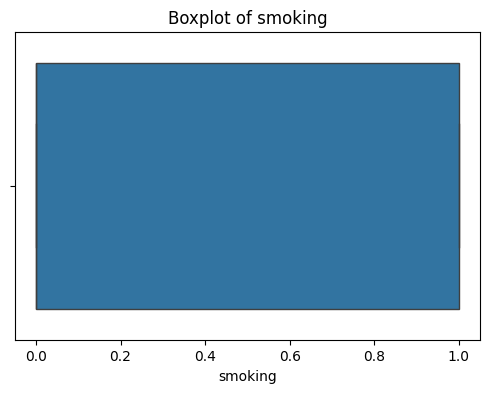

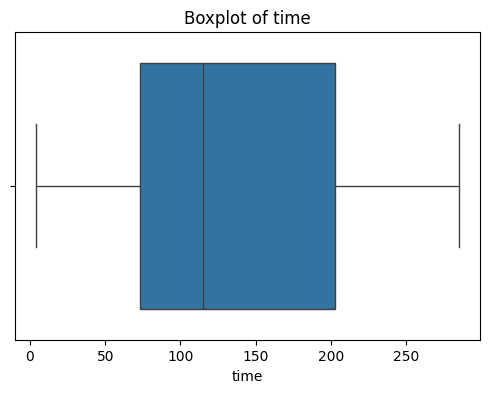

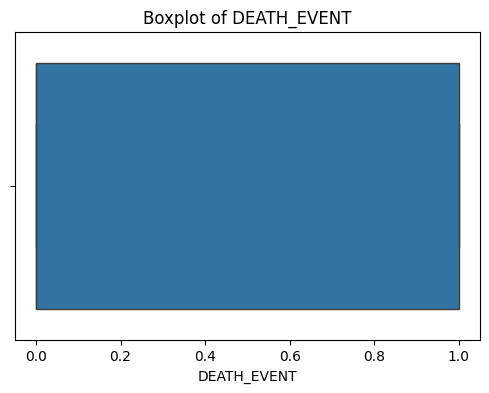

In [37]:
# Loop through each numerical column and create a boxplot
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
